<a href="https://colab.research.google.com/github/rizqyjoe/FER2013_VGG16_Modified/blob/main/Modified%20VGG16/Non%20Aug/Epoch%2050/009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-processing

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils import np_utils

import random

tf.random.set_seed(1234)
np.random.seed(1234)

from keras.initializers import glorot_uniform

In [2]:
#load file
data= pd.read_csv('/content/drive/MyDrive/dataset/fer2013 dataset/fer2013/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [4]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
labels=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [5]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [6]:
#split data 
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [7]:
num_classes = 7

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
print("x_train:",X_train.shape)
print("y_train:",y_train.shape)
print("x_val:",X_val.shape)
print("y_val:",y_val.shape)
print("x_test:",X_test.shape)
print("y_test:",y_test.shape)

x_train: (28709, 48, 48, 1)
y_train: (28709, 7)
x_val: (3589, 48, 48, 1)
y_val: (3589, 7)
x_test: (3589, 48, 48, 1)
y_test: (3589, 7)


In [9]:
#data augmentation
'''datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True)'''

datagen = ImageDataGenerator(rescale=1./255)

testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_train)
batch_size = 64

In [10]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [11]:
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

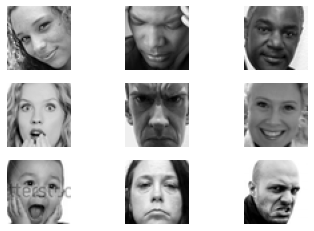

In [12]:
#displaying sample images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break

# Training Model

In [13]:
#Model Fix
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [ ]:
#Model ori
'''from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

In [ ]:
#save plot model to file
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=False)

In [14]:
#compile model
from keras.optimizers import Adam,SGD,RMSprop

opt = RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
# fit the model
num_epochs = 50
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/50
448/448 [==============================] - 64s 82ms/step - loss: 2.9107 - accuracy: 0.1815 - val_loss: 1.8312 - val_accuracy: 0.2492
Epoch 2/50
448/448 [==============================] - 35s 78ms/step - loss: 1.9099 - accuracy: 0.2137 - val_loss: 1.8437 - val_accuracy: 0.2497
Epoch 3/50
448/448 [==============================] - 35s 78ms/step - loss: 1.7809 - accuracy: 0.2708 - val_loss: 1.5832 - val_accuracy: 0.3750
Epoch 4/50
448/448 [==============================] - 35s 79ms/step - loss: 1.5910 - accuracy: 0.3669 - val_loss: 1.5164 - val_accuracy: 0.4051
Epoch 5/50
448/448 [==============================] - 35s 79ms/step - loss: 1.4521 - accuracy: 0.4189 - val_loss: 1.3391 - val_accuracy: 0.4713
Epoch 6/50
448/448 [==============================] - 35s 79ms/step - loss: 1.3508 - accuracy: 0.4759 - val_loss: 1.2938 - val_accuracy: 0.5114
Epoch 7/50
448/448 [==============================] - 35s 79ms/step - loss: 1.2748 - accuracy: 0.5172 - val_loss: 1.2478 - val_accuracy:

# Evaluate

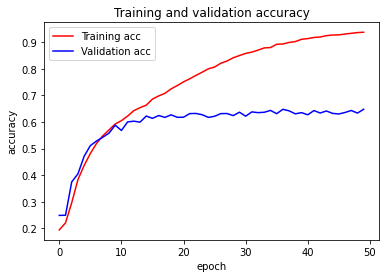

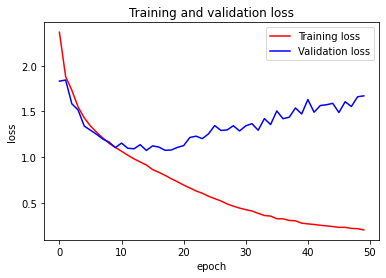

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [17]:
trainloss = model.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 10s 22ms/step - loss: 0.0509 - accuracy: 0.9853
Train Loss 0.05090304836630821
Train Acc: 0.9853355884552002
56/56 [==============================] - 2s 27ms/step - loss: 1.6701 - accuracy: 0.6473
Val Loss 1.6700645685195923
Val Acc: 0.6472554802894592
56/56 [==============================] - 1s 23ms/step - loss: 1.5847 - accuracy: 0.6553
Test Loss 1.5847049951553345
Test Acc: 0.6553357243537903


In [18]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)

    plt.rcParams["figure.figsize"] = (8,8)        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [19]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 3s 13ms/step


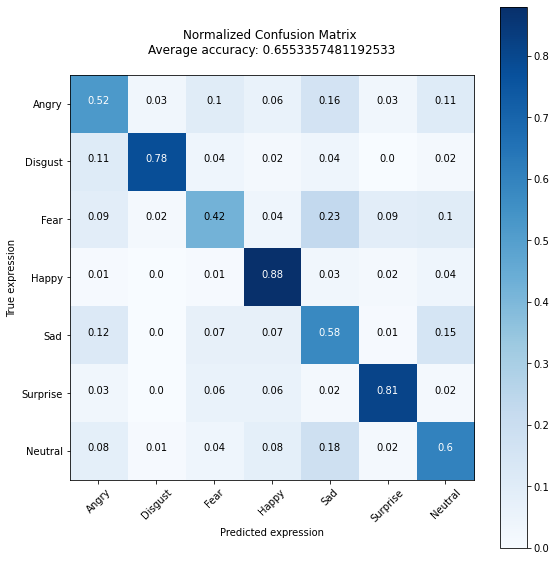

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Normalized Confusion Matrix \nAverage accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

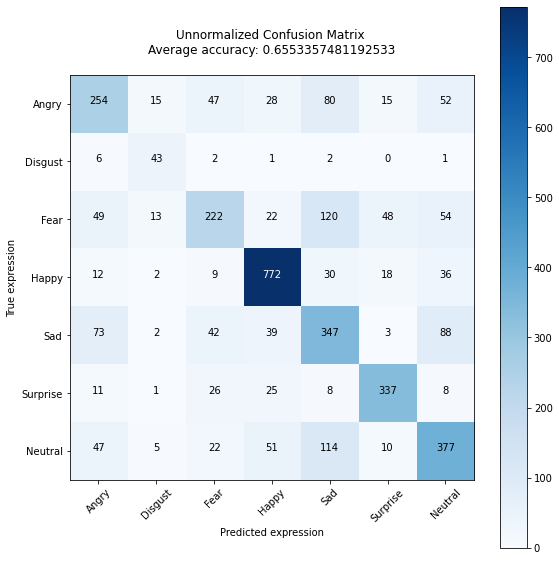

In [21]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=False,
                      cmap=plt.cm.Blues,
                      title='Unnormalized Confusion Matrix \nAverage accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [22]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.56      0.52      0.54       491
     Disgust       0.53      0.78      0.63        55
        Fear       0.60      0.42      0.49       528
       Happy       0.82      0.88      0.85       879
         Sad       0.50      0.58      0.54       594
    Surprise       0.78      0.81      0.80       416
     Neutral       0.61      0.60      0.61       626

    accuracy                           0.66      3589
   macro avg       0.63      0.66      0.64      3589
weighted avg       0.65      0.66      0.65      3589



In [23]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model/ModelFix_RMSprop0.0001_epoch50_noAug.h5")
print("saved")

saved


#Load Model

In [24]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/ModelFix_RMSprop0.0001_epoch50_noAug.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [25]:
trainloss = model_load.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model_load.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model_load.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 12s 23ms/step - loss: 0.0509 - accuracy: 0.9853
Train Loss 0.050903044641017914
Train Acc: 0.9853355884552002
56/56 [==============================] - 1s 22ms/step - loss: 1.6701 - accuracy: 0.6473
Val Loss 1.67006516456604
Val Acc: 0.6472554802894592
56/56 [==============================] - 1s 23ms/step - loss: 1.5847 - accuracy: 0.6553
Test Loss 1.5847047567367554
Test Acc: 0.6553357243537903


In [26]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)

    plt.rcParams["figure.figsize"] = (8,8)    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [27]:
y_pred_ = model_load.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 3s 13ms/step


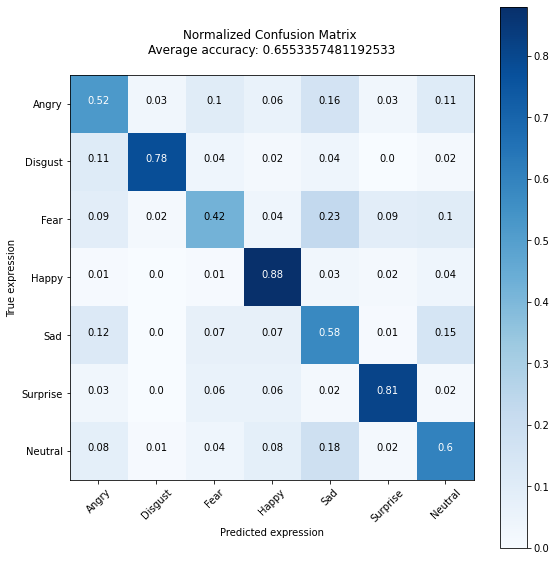

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Normalized Confusion Matrix \nAverage accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

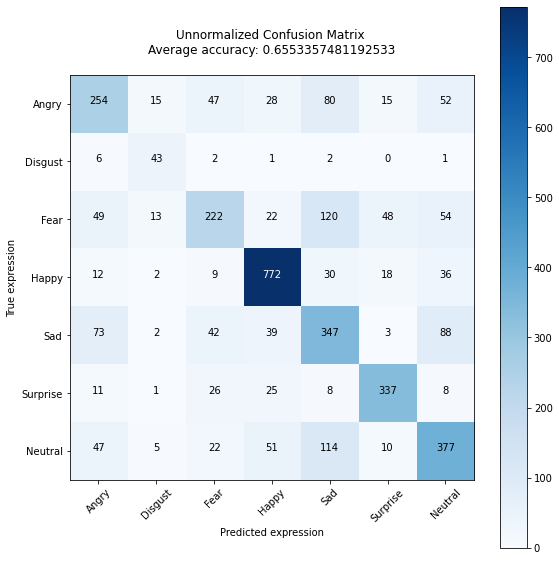

In [29]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=False,
                      cmap=plt.cm.Blues,
                      title='Unnormalized Confusion Matrix \nAverage accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [30]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.56      0.52      0.54       491
     Disgust       0.53      0.78      0.63        55
        Fear       0.60      0.42      0.49       528
       Happy       0.82      0.88      0.85       879
         Sad       0.50      0.58      0.54       594
    Surprise       0.78      0.81      0.80       416
     Neutral       0.61      0.60      0.61       626

    accuracy                           0.66      3589
   macro avg       0.63      0.66      0.64      3589
weighted avg       0.65      0.66      0.65      3589

